## Яндекс недвижимость

Задача проекта: по предоставленных данным установить параметры по которым в дальнейшем будет возможно определять рыночную стоимость объектов недвижимости.

## 1 Обзор данных

In [1]:
import pandas as pd 
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

display(df.head())

df.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Согласно документации к данным:

* `total_images` — число фотографий квартиры в объявлении;
* `last_price` — цена на момент снятия с публикации;  
* `total_area` — площадь квартиры в квадратных метрах;
* `first_day_exposition` — дата публикации;
* `rooms` — число комнат;
* `ceiling_height` — высота потолков;
* `floors_total` — всего этажей в доме;
* `living_area` — жилая площадь в квадратных метрах;
* `floor` — этаж;
* `is_apartment` — апартаменты (булев тип);
* `studio` — квартира-студия (булев тип);
* `open_plan` — свободная планировка;
* `kitchen_area` — площадь кухни в квадратных метрах;
* `balcony` — число балконов;
* `locality_name` — название населенного пункта;
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах;
* `cityCenters_nearest` — расстояние до центра города;
* `parks_around3000` — число парков в радиусе 3 км;
* `parks_nearest` — расстояние до ближайшего  парка;
* `ponds_around3000` — число водоёмов в радиусе 3 км;
* `ponds_nearest` — расстояние до ближайшего водоёма;
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия).

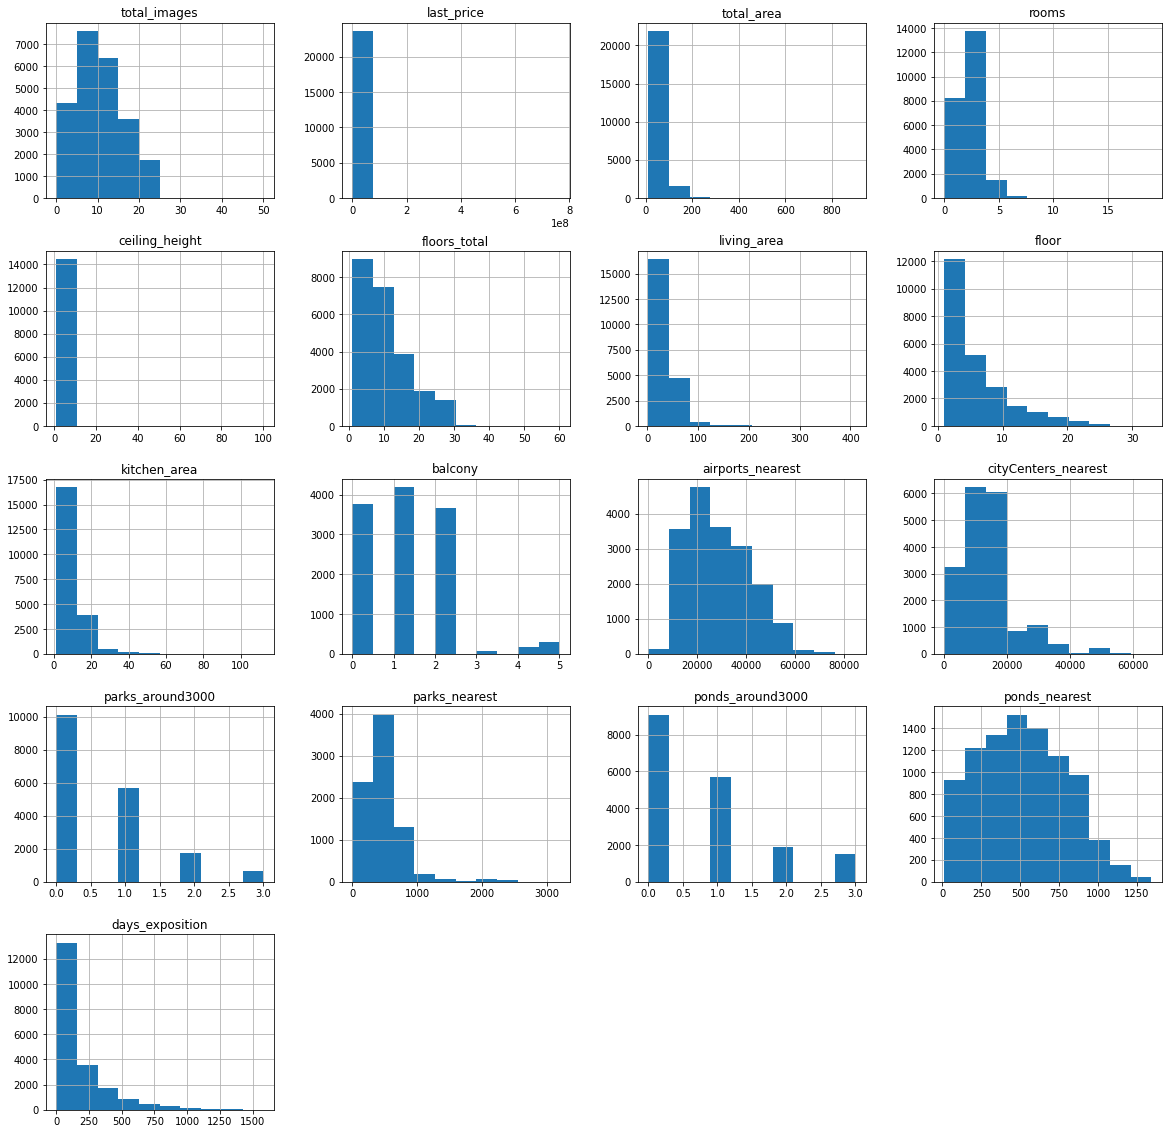

In [3]:
df.hist(figsize = (20, 20))
plt.show()

## 2 Предобработка данных

Первым делом проверим столбцы на наличие пропущенных значений:

In [4]:
for elem in df:
    print(elem, 'кол-во пропусков:', df[elem].isna().sum())

total_images кол-во пропусков: 0
last_price кол-во пропусков: 0
total_area кол-во пропусков: 0
first_day_exposition кол-во пропусков: 0
rooms кол-во пропусков: 0
ceiling_height кол-во пропусков: 9195
floors_total кол-во пропусков: 86
living_area кол-во пропусков: 1903
floor кол-во пропусков: 0
is_apartment кол-во пропусков: 20924
studio кол-во пропусков: 0
open_plan кол-во пропусков: 0
kitchen_area кол-во пропусков: 2278
balcony кол-во пропусков: 11519
locality_name кол-во пропусков: 49
airports_nearest кол-во пропусков: 5542
cityCenters_nearest кол-во пропусков: 5519
parks_around3000 кол-во пропусков: 5518
parks_nearest кол-во пропусков: 15620
ponds_around3000 кол-во пропусков: 5518
ponds_nearest кол-во пропусков: 14589
days_exposition кол-во пропусков: 3181


В столбце is_apartment должны находится булевы значения, но находятся строчные, проверим какие значения присутствуют в столбце.

In [5]:
print(df['is_apartment'].value_counts())

False    2725
True       50
Name: is_apartment, dtype: int64


В столбце много пропусков и несоответствующий тип данных. Изменим тип данных на булевый и проверим на наличие пропусков.

In [6]:
df['is_apartment'] = df['is_apartment'].astype('bool') #изменяем тип данных в столбце на булевый

print('Кол-во пропущенных значений в столбце is_apartment:\n', df['is_apartment'].isna().sum()) 

print('Кол-во уникальных значений в столбце is_apartment:\n', df['is_apartment'].value_counts())

Кол-во пропущенных значений в столбце is_apartment:
 0
Кол-во уникальных значений в столбце is_apartment:
 True     20974
False     2725
Name: is_apartment, dtype: int64


В столбце где показано количество балконов почти половина данных пропущенно, заменим пропуски на нулевое значение (скорее всего человек мог не указать для своего объявления кол-во балконов просто потому что их нет).

In [7]:
df['balcony'] = df['balcony'].fillna(value = 0) #заменим пропущенные значения на 0

print('Кол-во пропущенных значений в столбце balcony:\n', df['balcony'].isna().sum())

print('Кол-во уникальных значений в столбце balcony\n', df['balcony'].value_counts())

Кол-во пропущенных значений в столбце balcony:
 0
Кол-во уникальных значений в столбце balcony
 0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64


В таблице присутствует столбец где отображена иноформация о дате публиукации объявления, столбец имеет значения строчного типа, изменим на более удобный, то есть datetime.

In [8]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S') #изменим тип данных строный на тип datetime

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

Причина пропущенных значений в столбце balcony скорее всего человеческий фактор, человек мог просто не указать того чего нет, в столбце is_apartment был неправильный тип данных изменив на булевый пропусков в столбце не осталось, в данном столбце большее кол-во значений присуще 0, это можно объяснить тем что недвижимость имеющюю статус апартаменты стали строить не так давно, это довольно новый тип жилья, соответственно по отношению к уже построенным домам оно будет гораздо меньше.

In [9]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [10]:
df['last_price'] = df['last_price'].astype('float32')
df['total_area'] = df['total_area'].astype('float32')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float32       
 2   total_area            23699 non-null  float32       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> Можно еще заменить тип данных с float64 на float32 для экономии памяти

<div class="alert alert-info"> <b>Комментарий студента:</b> Попробовал изменить тип данных на float32.</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера V2:</b> Отлично! 

## 3 Категоризация  данных

Для дальнейшего анализа данных обавим следующие столбцы в таблицу:

* `meter_price` — цена квадратного метра;
* `publication_day` — день недели когда опубликовали объявление;  
* `publication_month` — месяц когда опубликовали объявление;
* `publication_year` — год когда опубликовали объявление;
* `apartment_floor` — этаж квартиры;
* `living_to_total` — отношение жилой и общей площади;
* `kitchen_to_total` — отношение площади кухни к общей.

Цена квадратного метра высчитывается по формуле = цена на момент снятия с публикации / общая площадь квартиры.

In [11]:
df['meter_price'] = df['last_price'] / df ['total_area'] #добавляем и расчитываем цену

display(df.head()) #проверяем корректность вычислений

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price
0,20,13000000.0,108.000000,2019-03-07,3,2.70,16.0,51.0,8,True,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.367188
1,7,3350000.0,40.400002,2018-12-04,1,NaN,11.0,18.6,1,True,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.789062
2,10,5196000.0,56.000000,2015-08-20,2,NaN,5.0,34.3,4,True,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.710938
3,0,64900000.0,159.000000,2015-07-24,3,NaN,14.0,NaN,9,True,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.093750
4,2,10000000.0,100.000000,2018-06-19,2,3.03,14.0,32.0,13,True,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000


Чтобы добавить столбцы с днём недели, месяцем и годом, используем стобец first_day_exposition, в нём храняться все нужные нам данные.

In [12]:
df['publication_day_prom'] = df['first_day_exposition'].dt.dayofweek #получаем номер дня недели

df['publication_month'] = df['first_day_exposition'].dt.month #получаем номер месяца

df['publication_year'] = df['first_day_exposition'].dt.year #получаем номер года

def categorization_day(prom):
    temp = prom['publication_day_prom'] 
    if temp == 0:
        return 'понедельник'
    elif temp == 1:
        return 'вторник'
    elif temp == 2:
        return 'среда'
    elif temp == 3:
        return 'четверг'
    elif temp == 4:
        return 'пятница'
    elif temp == 5:
        return 'суббота'
    else:
        return 'воскресенье'
    
df['publication_day'] = df.apply(categorization_day, axis = 1)

display(df.head()) #проверим работу функции

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,publication_day_prom,publication_month,publication_year,publication_day
0,20,13000000.0,108.000000,2019-03-07,3,2.70,16.0,51.0,8,True,...,1.0,482.0,2.0,755.0,NaN,120370.367188,3,3,2019,четверг
1,7,3350000.0,40.400002,2018-12-04,1,NaN,11.0,18.6,1,True,...,0.0,NaN,0.0,NaN,81.0,82920.789062,1,12,2018,вторник
2,10,5196000.0,56.000000,2015-08-20,2,NaN,5.0,34.3,4,True,...,1.0,90.0,2.0,574.0,558.0,92785.710938,3,8,2015,четверг
3,0,64900000.0,159.000000,2015-07-24,3,NaN,14.0,NaN,9,True,...,2.0,84.0,3.0,234.0,424.0,408176.093750,4,7,2015,пятница
4,2,10000000.0,100.000000,2018-06-19,2,3.03,14.0,32.0,13,True,...,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,вторник


<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> Обычно в датафреймах содержатся данные за несколько лет. Важно выбрать корректный метод для вычленения месяца, иначе месяца разных годов могут стать одним месяцем (метод month может привести к ошибке). Обрати внимание на метод astype('datetime64[M]'). Для его использования не нужно обращаться к pd.DatetimeIndex. В данной работе нам не нужно разделять месяца разных годов. Это практичеый совет на будущее:) 

Для категоризации этажей на соответсвующих жилому помещению создадим функцию.

In [13]:
def categorization_floor(prom):
    floor = prom['floor']
    floors_total = prom['floors_total']
    
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'
    
df['apartment_floor'] = df.apply(categorization_floor, axis = 1)

display(df.head(15))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,publication_day_prom,publication_month,publication_year,publication_day,apartment_floor
0,20,13000000.0,108.000000,2019-03-07,3,2.70,16.0,51.00,8,True,...,482.0,2.0,755.0,NaN,120370.367188,3,3,2019,четверг,другой
1,7,3350000.0,40.400002,2018-12-04,1,NaN,11.0,18.60,1,True,...,NaN,0.0,NaN,81.0,82920.789062,1,12,2018,вторник,первый
2,10,5196000.0,56.000000,2015-08-20,2,NaN,5.0,34.30,4,True,...,90.0,2.0,574.0,558.0,92785.710938,3,8,2015,четверг,другой
3,0,64900000.0,159.000000,2015-07-24,3,NaN,14.0,NaN,9,True,...,84.0,3.0,234.0,424.0,408176.093750,4,7,2015,пятница,другой
4,2,10000000.0,100.000000,2018-06-19,2,3.03,14.0,32.00,13,True,...,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,вторник,другой
5,10,2890000.0,30.400000,2018-09-10,1,NaN,12.0,14.40,5,True,...,NaN,NaN,NaN,55.0,95065.789062,0,9,2018,понедельник,другой
6,6,3700000.0,37.299999,2017-11-02,1,NaN,26.0,10.60,6,True,...,NaN,0.0,NaN,155.0,99195.710938,3,11,2017,четверг,другой
7,5,7915000.0,71.599998,2019-04-18,2,NaN,24.0,NaN,22,True,...,NaN,0.0,NaN,NaN,110544.695312,3,4,2019,четверг,другой
8,20,2900000.0,33.160000,2018-05-23,1,NaN,27.0,15.43,26,True,...,NaN,NaN,NaN,189.0,87454.765625,2,5,2018,среда,другой
9,18,5400000.0,61.000000,2017-02-26,3,2.50,9.0,43.60,7,True,...,NaN,0.0,NaN,289.0,88524.593750,6,2,2017,воскресенье,другой


Для вычисления отношения жилой и общей площади воспользуемся данными из столбцов living_area и total_area, соответственно для кухни и общей площади используем данные из столбца kitchen_area.

In [14]:
df['living_to_total'] = df['living_area'] / df['total_area'] 

df['kitchen_to_total'] = df['kitchen_area'] / df['total_area']

display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,meter_price,publication_day_prom,publication_month,publication_year,publication_day,apartment_floor,living_to_total,kitchen_to_total
0,20,13000000.0,108.000000,2019-03-07,3,2.70,16.0,51.0,8,True,...,755.0,NaN,120370.367188,3,3,2019,четверг,другой,0.472222,0.231481
1,7,3350000.0,40.400002,2018-12-04,1,NaN,11.0,18.6,1,True,...,NaN,81.0,82920.789062,1,12,2018,вторник,первый,0.460396,0.272277
2,10,5196000.0,56.000000,2015-08-20,2,NaN,5.0,34.3,4,True,...,574.0,558.0,92785.710938,3,8,2015,четверг,другой,0.612500,0.148214
3,0,64900000.0,159.000000,2015-07-24,3,NaN,14.0,NaN,9,True,...,234.0,424.0,408176.093750,4,7,2015,пятница,другой,NaN,NaN
4,2,10000000.0,100.000000,2018-06-19,2,3.03,14.0,32.0,13,True,...,48.0,121.0,100000.000000,1,6,2018,вторник,другой,0.320000,0.410000


## 4 Исследовательский анализ

Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.

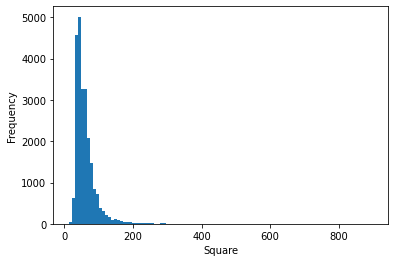

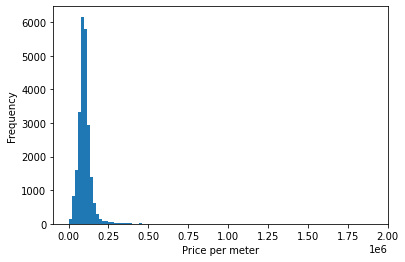

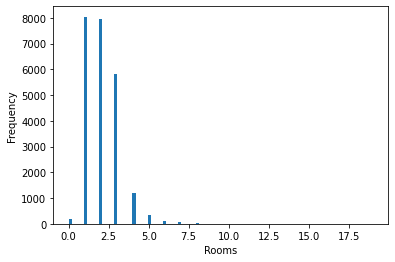

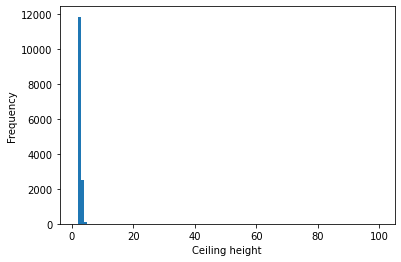

In [15]:
pd.Series(df['total_area']).plot(kind = 'hist', bins = 100)
plt.xlabel("Square")
plt.ylabel("Frequency")
plt.show()

pd.Series(df['meter_price']).plot(kind = 'hist', bins = 100)
plt.xlabel("Price per meter")
plt.ylabel("Frequency")
plt.show()

pd.Series(df['rooms']).plot(kind = 'hist', bins = 100)
plt.xlabel("Rooms")
plt.ylabel("Frequency")
plt.show()

pd.Series(df['ceiling_height']).plot(kind = 'hist', bins = 100)
plt.xlabel("Ceiling height")
plt.ylabel("Frequency")
plt.show()

Изучим время продажи квартиры. Построим гистограмму.

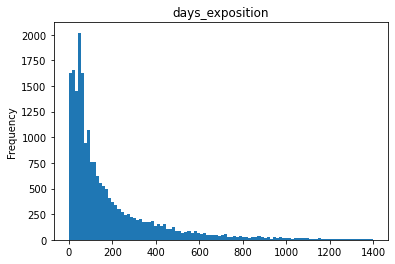

In [16]:
pd.Series(df['days_exposition']).plot(kind = 'hist', title = 'days_exposition', bins = 100, range = (0, 1400))
plt.show()

Выедеи среднее и медиану столбца.

In [17]:
print(df['days_exposition'].describe())

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64


Минимальное время за которое продали квартиры равно 1 дню, максмимальное время составляет 1580 дней. В среднем время продажи составляет 180 дней, при этом половина всех предложений было реализованно за 95 дней.

### Уберём лишние значения

На гистограмме времени продажи квартиры заметно, что продаж продолжительность более 600 дней немного, они сливаются с нулём. Так же довольно много случаев когда квартира продавалась очень быстро, уберём значения ниже 65 дней.

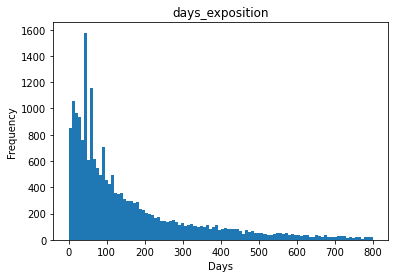

(-10.0, 1000.0)

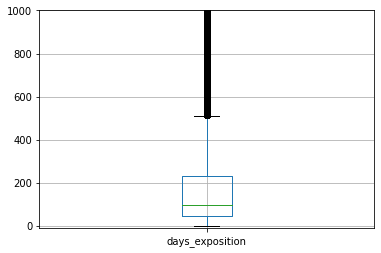

In [18]:
good_df = df.query('days_exposition < 1000')
good_df = df.query('days_exposition > 0')

pd.Series(good_df['days_exposition']).plot(kind = 'hist', title = 'days_exposition', bins = 100, range = (0, 800))
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

good_df.boxplot('days_exposition')
plt.ylim(-10, 1000)

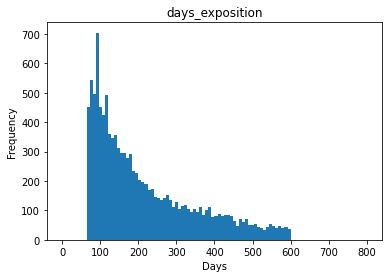

In [19]:
good_df = df.query('days_exposition < 600')
good_df = good_df.query('days_exposition > 65')

pd.Series(good_df['days_exposition']).plot(kind = 'hist', title = 'days_exposition', bins = 100, range = (0, 800))
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

На гистограммах плщади и кол-ва комнат есть значения сливающиеся с нулем, уберём их.

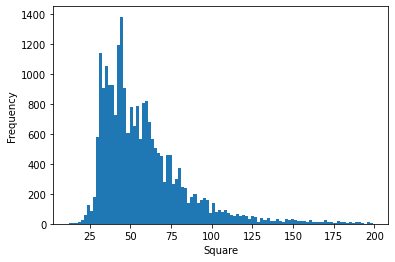

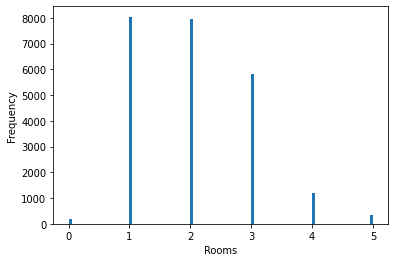

In [20]:
good_total_area = df.query('total_area < 200')

pd.Series(good_total_area['total_area']).plot(kind = 'hist', bins = 100)
plt.xlabel("Square")
plt.ylabel("Frequency")
plt.show()

good_rooms = df.query('rooms < 6')

pd.Series(good_rooms['rooms']).plot(kind = 'hist', bins = 100)
plt.xlabel("Rooms")
plt.ylabel("Frequency")
plt.show()

### Определение факторов влияющих на стоимость квартиры

Проверим как сильно влияет площадь квартиры, кол-во комнат, расположение относительно центра города на цену квартиры.

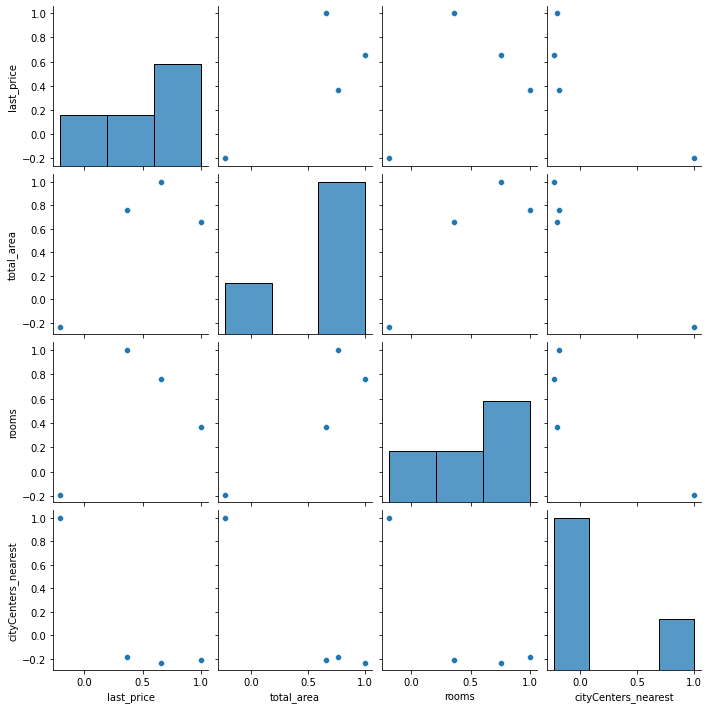

In [21]:
sns.pairplot(df[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr())
plt.show()

Изучив корреляционные матрицы можно сделать вывод, что больше всего влияние на стоимость квартиры оказывет её площадь средний коэффициент корреляции площади и стоимость квартиры приблизительно 0,7, чем больше площадь тем больше её стоимость. Количество комнат так же влияет на стоимость, но не так сильно как площадь средний коэффициент корреляции составляет приблизительно 0,5, чем больше комнат в квартире, тем больше её стоимость. Удаление от центра города влияет на стоимость квартиры отрицательно, чем больше квартира удалена от центра тем меньше её стоимость, средний коэффциент составляет -0,2.

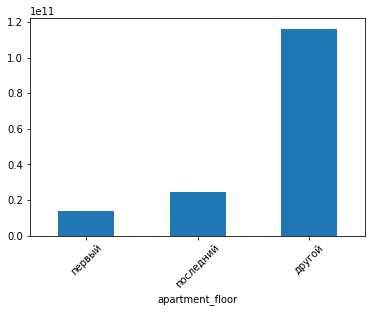

In [22]:
floor_group = df.groupby('apartment_floor')['last_price'].sum().sort_values()

floor_group.plot(kind = 'bar')

#df.plot(kind = 'scatter', x = 'apartment_floor', y = 'last_price')

plt.xticks(rotation = 45)
plt.show()

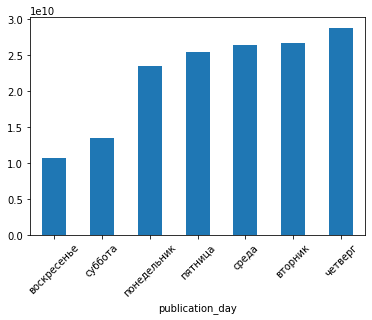

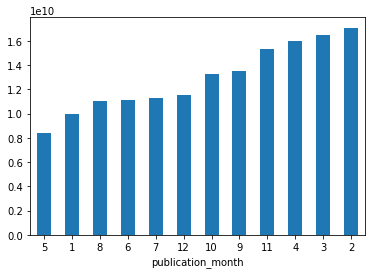

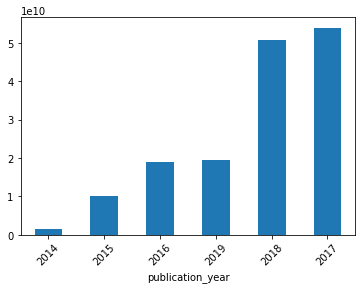

In [23]:
day_group = df.groupby('publication_day')['last_price'].sum().sort_values()
day_group.plot(kind = 'bar')

plt.xticks(rotation = 45)
plt.show()

month_group = df.groupby('publication_month')['last_price'].sum().sort_values()
month_group.plot(kind = 'bar')

plt.xticks(rotation = 0)
plt.show()

year_group = df.groupby('publication_year')['last_price'].sum().sort_values()
year_group.plot(kind = 'bar')

plt.xticks(rotation = 45)
plt.show()

### Населённые пункты с наибольшим числом объявлений

In [24]:
top_10_citys = df.pivot_table(index = ['locality_name'], values = ['meter_price'], aggfunc = ['count', 'mean', 'max', 'min'])

display(top_10_citys.head())

top_10_citys['mean', 'meter_price'] = top_10_citys['mean', 'meter_price'].astype('int')
top_10_citys['max', 'meter_price'] = top_10_citys['max', 'meter_price'].astype('int')
top_10_citys['min', 'meter_price'] = top_10_citys['min', 'meter_price'].astype('int')

display(top_10_citys.sort_values(('count','meter_price'), ascending = False).head(10))


,count,mean,max,min
,meter_price,meter_price,meter_price,meter_price
locality_name,,,,
Бокситогорск,16,17551.591797,21590.908203,14444.444336
Волосово,36,40183.324219,52030.453125,25000.000000
Волхов,111,35087.679688,48275.863281,20063.695312
Всеволожск,398,68654.476562,640422.375000,31400.000000
Выборг,237,58141.910156,107473.117188,18750.000000


,count,mean,max,min
,meter_price,meter_price,meter_price,meter_price
locality_name,,,,
Санкт-Петербург,15721,114849,1907500,111
посёлок Мурино,522,85752,138580,50000
посёлок Шушары,440,78677,147826,47700
Всеволожск,398,68654,640422,31400
Пушкин,369,103125,256521,59836
Колпино,338,75424,125000,47957
посёлок Парголово,327,90175,138522,39205
Гатчина,307,68746,146315,10507


Построив сводную таблицу и получив первые 10 населённых пунктов с самым большим кол-вом объявлений можно сделать вывод, что в Санкт-Петербурге самая минимальная и самая максимальная цена за квадратный метр.

### Изучение предложения квартир в Санкт-Петербурге

Создадим столбец где будет хранится расстояние до центра в километрах и выделим предложения только из Петербурга.

In [25]:
df['city_kilometer'] = df['cityCenters_nearest'] / 1000
df['city_kilometer'] = df['city_kilometer'].fillna(df['city_kilometer'].mean())
df['city_kilometer'] = df['city_kilometer'].astype('int')

data_spb = df.loc[df['locality_name'] == 'Санкт-Петербург']

data_spb.reset_index(drop=True, inplace=True)
                    
display(data_spb.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,meter_price,publication_day_prom,publication_month,publication_year,publication_day,apartment_floor,living_to_total,kitchen_to_total,city_kilometer
0,20,13000000.0,108.000000,2019-03-07,3,2.70,16.0,51.0,8,True,...,NaN,120370.367188,3,3,2019,четверг,другой,0.472222,0.231481,16
1,10,5196000.0,56.000000,2015-08-20,2,NaN,5.0,34.3,4,True,...,558.0,92785.710938,3,8,2015,четверг,другой,0.612500,0.148214,13
2,0,64900000.0,159.000000,2015-07-24,3,NaN,14.0,NaN,9,True,...,424.0,408176.093750,4,7,2015,пятница,другой,NaN,NaN,6
3,2,10000000.0,100.000000,2018-06-19,2,3.03,14.0,32.0,13,True,...,121.0,100000.000000,1,6,2018,вторник,другой,0.320000,0.410000,8
4,5,7915000.0,71.599998,2019-04-18,2,NaN,24.0,NaN,22,True,...,NaN,110544.695312,3,4,2019,четверг,другой,NaN,0.263966,11


Построим график зависимости цены от удалённости от центра.

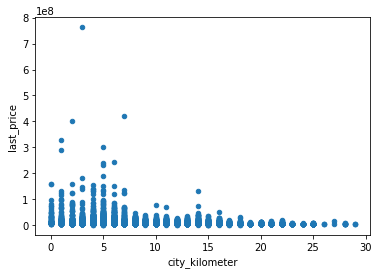

In [26]:
data_spb.plot(kind = 'scatter', x = 'city_kilometer', y = 'last_price')
plt.show()

Из графика можно сделать вывод, что центр города закнчивается на границе 7 километров, после этого расстояния цена сильно снижается по сравнению с предложениями удаение от центра которых составлет менее 7 километров.

### Квартиры в центре города

Выделим квартиры в центре и проанализирум какие факторы влияют на цену квартиры.

In [27]:
data_spb_7_km = data_spb.loc[data_spb['city_kilometer'] < 7]

data_spb_7_km.reset_index(drop=True, inplace=True)

display(data_spb_7_km.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,meter_price,publication_day_prom,publication_month,publication_year,publication_day,apartment_floor,living_to_total,kitchen_to_total,city_kilometer
0,0,64900000.0,159.000000,2015-07-24,3,NaN,14.0,NaN,9,True,...,424.0,408176.093750,4,7,2015,пятница,другой,NaN,NaN,6
1,8,6500000.0,97.199997,2015-10-31,2,NaN,3.0,46.5,1,True,...,265.0,66872.429688,5,10,2015,суббота,первый,0.478395,0.201646,2
2,6,15500000.0,149.000000,2017-06-26,5,NaN,5.0,104.0,4,True,...,644.0,104026.843750,0,6,2017,понедельник,другой,0.697987,0.114094,3
3,7,45000000.0,161.000000,2017-10-17,3,3.2,8.0,38.0,4,True,...,541.0,279503.093750,1,10,2017,вторник,другой,0.236025,0.310559,6
4,20,11795000.0,136.000000,2017-09-22,6,3.0,2.0,94.0,2,True,...,NaN,86727.937500,4,9,2017,пятница,последний,0.691176,0.080882,6


Построим график зависимости цены от числа комнат.

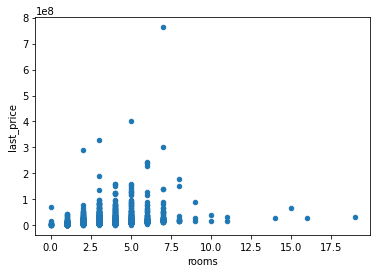

In [28]:
data_spb_7_km.plot(kind = 'scatter', x = 'rooms', y = 'last_price')
plt.show()

На этом графике видно что по учеличению числа комнат цена растёт, самая дорогая квартира имеет 7 комнат.

Посторим график зависимости цены от этажа на котором она находится.

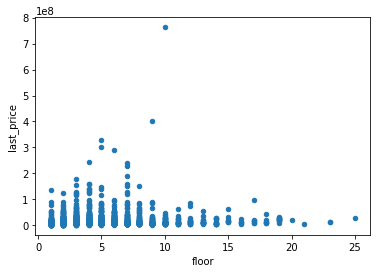

In [29]:
data_spb_7_km.plot(kind = 'scatter', x = 'floor', y = 'last_price')
plt.show()

Как видно на графике самые дорогие квартиры расположены на 10 этаже, но в большем кол-ве дорогостоящие квартиры находтся на 3 - 5 этажах.

Построим график зависимости даты размещения от цены квартиры.

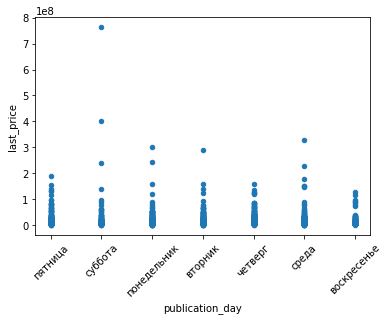

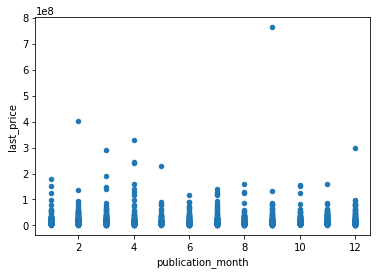

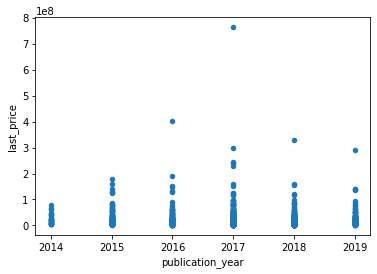

In [30]:
data_spb_7_km.plot(kind = 'scatter', x = 'publication_day', y = 'last_price')
plt.xticks(rotation = 45)
plt.show()

data_spb_7_km.plot(kind = 'scatter', x = 'publication_month', y = 'last_price')
plt.show()

data_spb_7_km.plot(kind = 'scatter', x = 'publication_year', y = 'last_price')
plt.show()

Из графиков отражающих время публикации объявления можно сделать выод, что цена публикации не сильно зависит от дня недели когда было выложенно объявление, кждый день недели была примерно одинаковая стимость. Если посмотреть на второй график можно заметить, что самая больша цена на квартиру была заявленна в середине весны, самая минимальная в середине лета. В 2014 году больше всего объявлений с низкой ценной по сравнению с остальными годами публикации, в 2015 году можно заметить одни из самых дорогих объявлений.

In [31]:
mean_spb = data_spb_7_km['last_price'].mean()

print('Средняя цена квартиры в центре города:\n', mean_spb)

data_not_centre = data_spb.loc[data_spb['city_kilometer'] > 7]
mean_not_centre = data_not_centre['last_price'].mean()

print('Средняя цена квартиры за пределами центра:\n', mean_not_centre)

data_spb.head()

Средняя цена квартиры в центре города:
 14967530.0
Средняя цена квартиры за пределами центра:
 6001693.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,meter_price,publication_day_prom,publication_month,publication_year,publication_day,apartment_floor,living_to_total,kitchen_to_total,city_kilometer
0,20,13000000.0,108.000000,2019-03-07,3,2.70,16.0,51.0,8,True,...,NaN,120370.367188,3,3,2019,четверг,другой,0.472222,0.231481,16
1,10,5196000.0,56.000000,2015-08-20,2,NaN,5.0,34.3,4,True,...,558.0,92785.710938,3,8,2015,четверг,другой,0.612500,0.148214,13
2,0,64900000.0,159.000000,2015-07-24,3,NaN,14.0,NaN,9,True,...,424.0,408176.093750,4,7,2015,пятница,другой,NaN,NaN,6
3,2,10000000.0,100.000000,2018-06-19,2,3.03,14.0,32.0,13,True,...,121.0,100000.000000,1,6,2018,вторник,другой,0.320000,0.410000,8
4,5,7915000.0,71.599998,2019-04-18,2,NaN,24.0,NaN,22,True,...,NaN,110544.695312,3,4,2019,четверг,другой,NaN,0.263966,11


### Средняя цена каждого километра

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,meter_price,publication_day_prom,publication_month,publication_year,publication_day,apartment_floor,living_to_total,kitchen_to_total,city_kilometer
0,0,64900000.0,159.000000,2015-07-24,3,NaN,14.0,NaN,9,True,...,424.0,408176.093750,4,7,2015,пятница,другой,NaN,NaN,6
1,8,6500000.0,97.199997,2015-10-31,2,NaN,3.0,46.5,1,True,...,265.0,66872.429688,5,10,2015,суббота,первый,0.478395,0.201646,2
2,6,15500000.0,149.000000,2017-06-26,5,NaN,5.0,104.0,4,True,...,644.0,104026.843750,0,6,2017,понедельник,другой,0.697987,0.114094,3
3,7,45000000.0,161.000000,2017-10-17,3,3.2,8.0,38.0,4,True,...,541.0,279503.093750,1,10,2017,вторник,другой,0.236025,0.310559,6
4,20,11795000.0,136.000000,2017-09-22,6,3.0,2.0,94.0,2,True,...,NaN,86727.937500,4,9,2017,пятница,последний,0.691176,0.080882,6


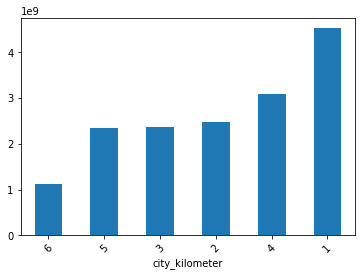

In [44]:
data_spb_7_km_two = data_spb.loc[data_spb['city_kilometer'] < 7]
data_spb_7_km_two = data_spb_7_km_two.loc[data_spb_7_km_two['city_kilometer'] > 0]
data_spb_7_km_two.reset_index(drop=True, inplace=True)

display(data_spb_7_km_two.head())

data_spb_7_km_two['kilometer_price'] = data_spb_7_km_two['last_price'] / data_spb_7_km_two['city_kilometer']

result = data_spb_7_km_two.groupby('city_kilometer')['kilometer_price'].sum().sort_values()
result.plot(kind = 'bar')

plt.xticks(rotation = 45)
plt.show()

### Общий вывод

Для исследования сервиса был предоставлен файл с информацией о продажах квартир в России. Для проведения исследования факторов влияющих на продажи квартир я провел предобработку данных, изменил тип данных некоторых столбцов в некотрых из которых были некорректны, а так же заменил пропущенные значения. Убрав лишние значения (которые выбиваются из нормального распределения) я выделил часть данных имеющих отнощение только к городу Санкт-Петербург. Далее я выделил факторы влияющие на стоимость квартиры в городе, такие как: кол-во комнат, этаж на которм расположена квартира, время когда объявление о пражи появилось в сервисе. В конце исследования я выделил информацию о квартирах расположенных в центре города (не более 7 км от центра) и сравнил среднюю стоимость квартиры в центре и за его пределами (средня цена в центре города более чем в два раза превышает среднюю цену за центром города), также я изучил влияние расстония от центра города на стоимость жилья (чем ближе к центру города находятся квартиры, тем больше их стоимость).